<h1 style="text-align:center; color:purple">House price prediction using Linear regression</h1>

<h2 style="text-align:center; color:pink">Presentation</h2>

<center>
    In this project, I will use linear regression to predict the price of a house based on the house's features.
</center>

<h2>1 - Installations and Imports</h2>

In [43]:
%%capture
!pip3 install numpy
!pip3 install matplotlib
!pip3 install pandas
!pip3 install scipy
from scipy.stats import norm

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
import math
%matplotlib inline

<h2>2 - Load dataset inside the file</h2>

To load the data I used the library "pandas", the data is in a csv file named "dataset-houseprice2.csv" you can find it in the project folder at "HousePricePredictionLinearRegression/dataset-houseprice2.csv".

In [45]:
# Load data
data = pd.read_csv('dataset-houseprice2.csv')

In [46]:
# Visualize data
data.head()

,price,bedrooms,bathrooms,sqft,floors,condition,grade,yr_built
0,221900.0,3,1.00,1180,1.0,3,7,1955
1,538000.0,3,2.25,2570,2.0,3,7,1951
2,180000.0,2,1.00,770,1.0,3,6,1933
3,604000.0,4,3.00,1960,1.0,5,7,1965
4,510000.0,3,2.00,1680,1.0,3,8,1987


<h2>3 - Visualize the data</h2>

In [47]:
# Take the dataset and drop the "Price" variable so we can load the "inputs" data inside the variable "X_train"
X_train = data.drop(columns=['price']).values.tolist()
X_features = ['bedrooms', 'bathrooms', 'sqft', 'floors', 'condition', 'grade', 'yr_built']
# Convert into a numpy array so we can work with the data
X_train = np.array(X_train)
print(X_train)

[[3.000e+00 1.000e+00 1.180e+03 ... 3.000e+00 7.000e+00 1.955e+03]
 [3.000e+00 2.250e+00 2.570e+03 ... 3.000e+00 7.000e+00 1.951e+03]
 [2.000e+00 1.000e+00 7.700e+02 ... 3.000e+00 6.000e+00 1.933e+03]
 ...
 [3.000e+00 2.000e+00 2.330e+03 ... 3.000e+00 7.000e+00 1.986e+03]
 [4.000e+00 3.000e+00 2.170e+03 ... 3.000e+00 8.000e+00 1.997e+03]
 [3.000e+00 2.000e+00 1.760e+03 ... 4.000e+00 7.000e+00 1.943e+03]]


In [48]:
# Load the "targets" data inside the "y_train" variable
y_train = data['price']
# Convert into a numpy array so we can work with the data
y_train = np.array(y_train)

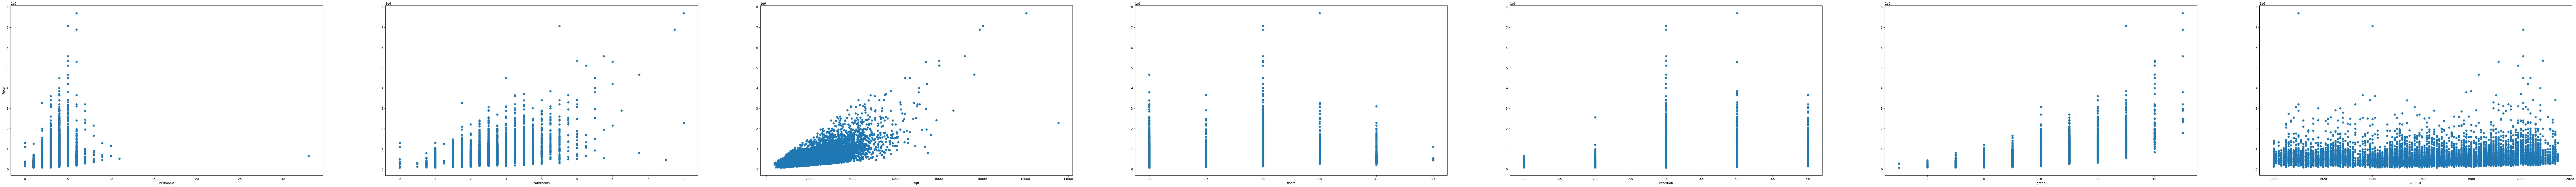

In [49]:
# Visualize the dataset by plotting each features versus the price 
fig, ax = plt.subplots(1, 7, figsize=(150, 10), sharey=False)
for i in range(len(ax)):
    ax[i].scatter([x[i] for x in X_train], y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price")
plt.show()